# Loading for Single Cell Analysis Directly from FCS files

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.objects as so

import palmettobug as pbug

The PalmettoBUG package is copyrighted 2024-2025 by the Medical University of South Carolina and licensed under the GPL-3 license.
It is free & open source software, can  be redistributed in compliance with the GPL3 license, and comes with absolutely no warranty.
In python, use palmettobug.print_license() to see the license, or use palmettobug.print_3rd_party_license_info() to print information
about the licenses and copyright of 3rd party software used in PalmettoBUG itself or in the creation of PalmettoBUG.


In [2]:
pbug.__version__

'0.2.11'

### CHANGE The following directory to match an existing directory on your computer if you are testing this tutorial on your own machine!

In [3]:
my_computer_path =  "C:/Users/Default/Desktop"  ## CHANGE This DIRECTORY to match an existing directory on your computer if you testing this tutorial on your own machine!

## Create new CyTOF directory, fetch and load example FCS data:

In [4]:
new_directory = f"{my_computer_path}/Example_CyTOF"       
#pbug.fetch_CyTOF_example(my_computer_path)
Analysis_experiment = pbug.Analysis()
Analysis_experiment.load_data(new_directory + "/main")

Could not load regionprops data, presuming this is a solution-mode dataset -- Spatial analyses will not be possible.


## Example Plots:

For a more full example of Single Cell Analysis, including cell clustering, annotaiton & merging, etc. see the Core Pipeline notebooks.
This notebook is primarily just showing how to load the example CyTOF data, not with its analysis.

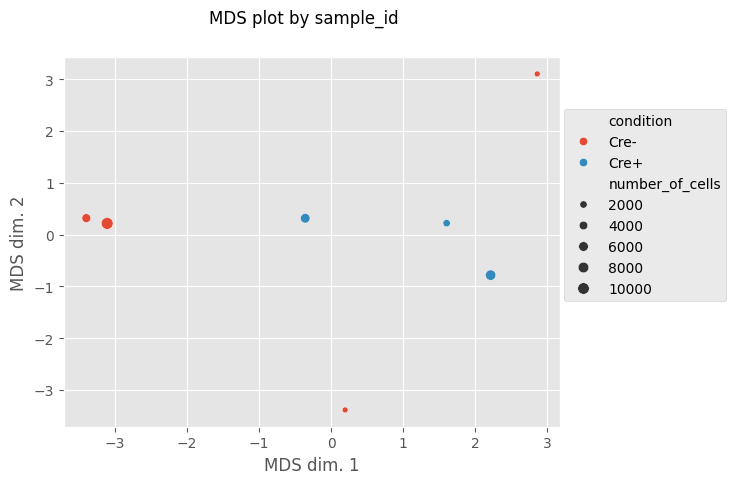

In [5]:
fig, MDS_df = Analysis_experiment.plot_MDS(marker_class = "type", color_by = "condition", print_stat = True)
fig

In [6]:
'''
Since I don't plan on dropping any of the sample_id's I will proceed with the FlowSOM:
'''

Analysis_experiment.do_flowsom(n_clusters = 20, XY_dim = 10, seed = 1234)

C:\Users\benca\miniforge3\envs\main\lib\site-packages\mudata\_core\mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
C:\Users\benca\miniforge3\envs\main\lib\site-packages\mudata\_core\mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)
2025-10-23 10:05:39.890 | DEBUG    | flowsom.main:__init__:82 - Reading input.
2025-10-23 10:05:39.921 | DEBUG    | flowsom.main

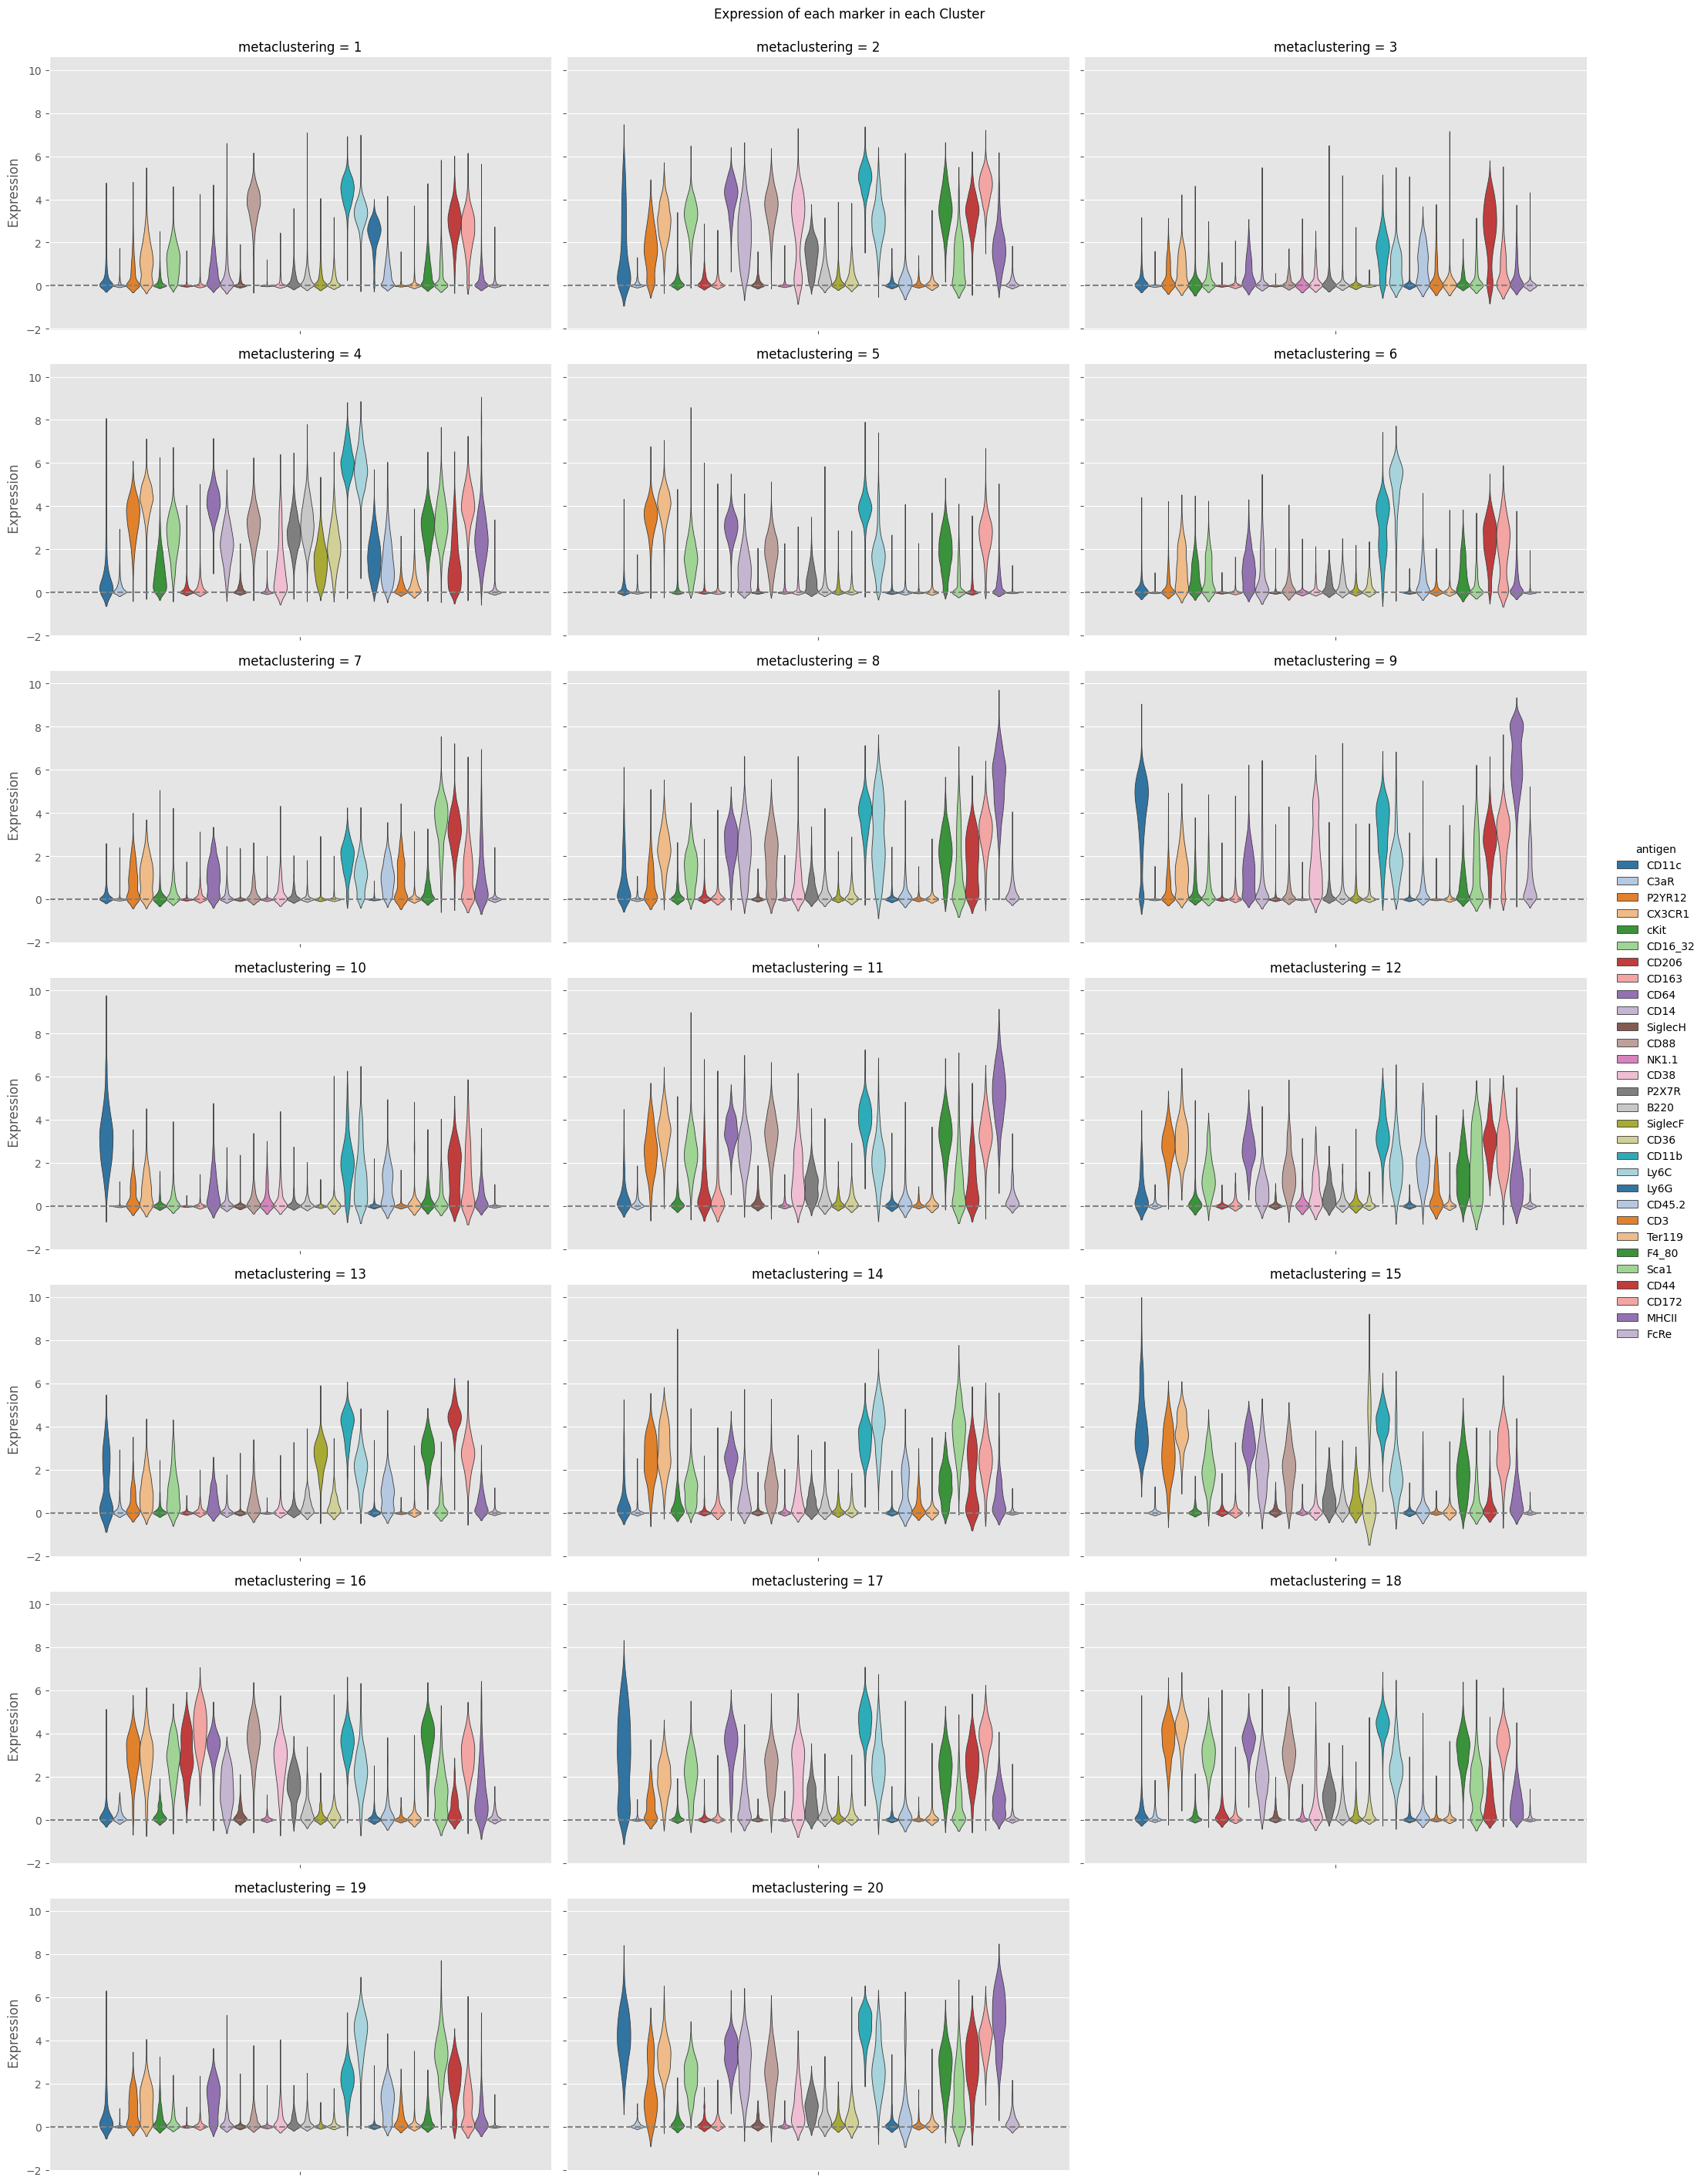

In [7]:
fig = Analysis_experiment.plot_cluster_distributions(filename = "violin", groupby_column = "metaclustering", marker_class = 'type', 
                                    plot_type = "violin", comp_type = "raw")
fig

In [8]:
stats_out = Analysis_experiment.do_cluster_stats(groupby_column = "metaclustering", marker_class = 'type')
cluster_to_examine = 2
display(stats_out[cluster_to_examine])   ## or display(Analysis_experiment.df_out_dict[cluster_to_examine]) 

,F_statistic,p_values,FDR_corrected,Difference in expression mean,st_error
CD38,29.240000,3.021000e-07,0.000009,1.69000,0.226000
CD16_32,22.500000,5.520000e-06,0.000083,1.87000,0.119600
CD172,18.200000,3.837000e-05,0.000384,1.93000,0.088160
CD88,16.120000,1.008000e-04,0.000756,2.06400,0.088990
F4_80,15.640000,1.263000e-04,0.000758,1.89200,0.076920
CD64,13.450000,3.573000e-04,0.001787,1.92700,0.068920
CD14,12.570000,5.482000e-04,0.002188,1.38500,0.251000
CD44,12.440000,5.835000e-04,0.002188,1.56500,0.080450
CD11b,8.545000,4.098000e-03,0.013660,1.52200,0.060140
P2X7R,6.455000,1.226000e-02,0.036780,0.66760,0.069780


In [9]:
Analysis_experiment.do_UMAP(marker_class = "type", cell_number = 1000, seed = 0)

C:\Users\benca\miniforge3\envs\main\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


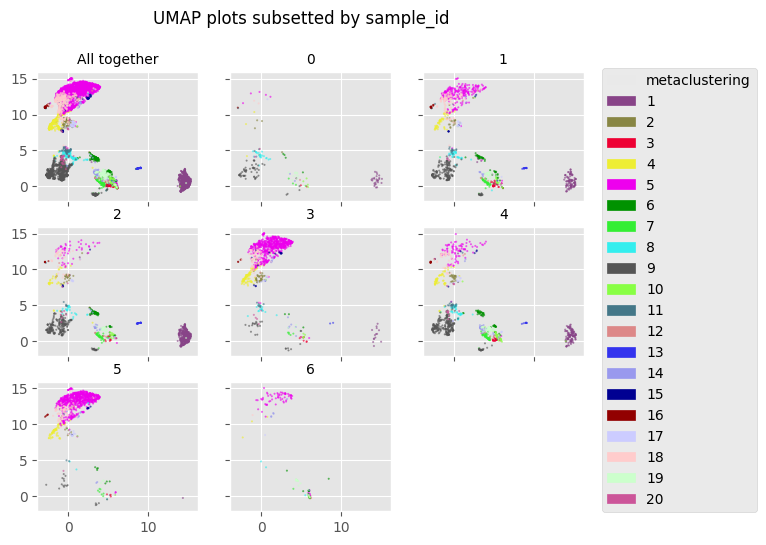

In [10]:
fig = Analysis_experiment.plot_facetted_DR(filename = "facetted_umap", color_by = "metaclustering", subsetting_column = "sample_id", 
                                    number_of_columns = 3, color_bank = None, kind = "UMAP")
fig

In [11]:
## export:
'''NOTE! This export is taken up by the CSV_load example notebook!'''

include_marker_class_row = True     ## use this when re-importing into PalmettoBUG, otherwise leave False if importing into another software
Analysis_experiment.export_data(include_marker_class_row = include_marker_class_row, filename = 'export')

antigen,BCKG190Di,Ba138Di,CD11c,B1,B2,B3,Ce140Di,Cs133Di,C3aR,P2YR12,...,Time,index,sample_id,file_name,patient_id,condition,clustering,metaclustering,scaling,masks_folder
0,0.0,3.895608,0.248565,3.405578,3.067043,3.066973,0.0,0.0,0.592824,4.325124,...,3.796436,0,0,Barcode #8.fcs,na,Cre-,61,18,unscale,None
1,0.0,3.681421,0.355128,2.147621,2.447138,2.135874,0.0,0.0,0.051988,0.0,...,8.70974,1,0,Barcode #8.fcs,na,Cre-,67,3,unscale,None
2,0.0,4.042782,4.506316,2.4991,2.652415,2.560925,0.120025,0.0,0.0,0.243994,...,9.746684,2,0,Barcode #8.fcs,na,Cre-,99,9,unscale,None
3,0.0,0.0,6.405453,2.196801,5.333436,2.047101,1.576287,0.0,0.0,0.0,...,10.659575,3,0,Barcode #8.fcs,na,Cre-,87,10,unscale,None
4,0.0,4.247361,0.0,2.896898,3.088958,2.276405,0.0,0.0,0.0,0.968739,...,10.895327,4,0,Barcode #8.fcs,na,Cre-,38,6,unscale,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31158,0.119976,5.902887,0.211383,1.178466,1.317018,0.753613,0.256526,0.0,0.0,2.171962,...,14.733731,31158,6,Barcode #12.fcs,na,Cre-,53,18,unscale,None
31159,0.0,5.650714,0.0,0.0,0.0,0.0,0.0,0.077194,0.0,0.048049,...,14.756608,31159,6,Barcode #12.fcs,na,Cre-,39,6,unscale,None
31160,0.0,4.884189,0.0,1.360009,0.712095,0.597875,0.0,0.0,0.0,3.869649,...,14.762814,31160,6,Barcode #12.fcs,na,Cre-,4,5,unscale,None
31161,0.615399,5.610257,0.0,1.344239,0.0,0.19547,0.0,0.0,0.146257,3.092133,...,14.765406,31161,6,Barcode #12.fcs,na,Cre-,34,5,unscale,None


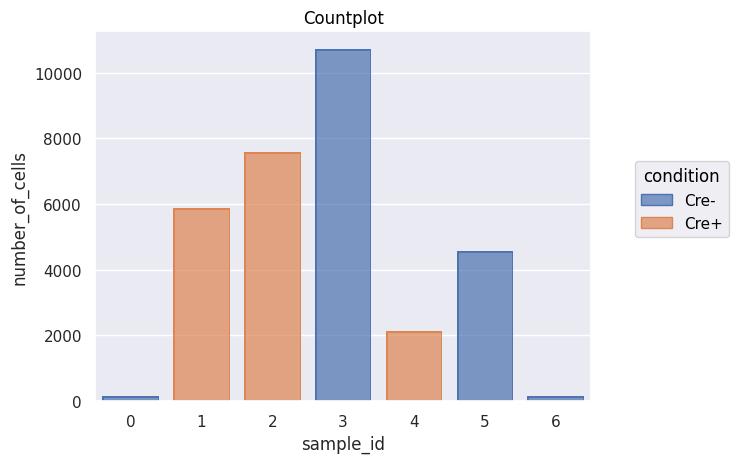

In [12]:
Analysis_experiment.plot_cell_counts()

In [13]:
Analysis_experiment.metadata

,file_name,sample_id,patient_id,condition,number_of_cells
0,Barcode #8.fcs,0,na,Cre-,155
1,Barcode #1.fcs,1,na,Cre+,5875
2,Barcode #5.fcs,2,na,Cre+,7572
3,Barcode #11.fcs,3,na,Cre-,10721
4,Barcode #3.fcs,4,na,Cre+,2134
5,Barcode #10.fcs,5,na,Cre-,4558
6,Barcode #12.fcs,6,na,Cre-,147


In [14]:
Analysis_experiment.data.obs[Analysis_experiment.data.obs['sample_id'] == '4']

,sample_id,file_name,patient_id,condition,clustering,metaclustering
24323,4,Barcode #3.fcs,na,Cre+,71,18
24324,4,Barcode #3.fcs,na,Cre+,40,5
24325,4,Barcode #3.fcs,na,Cre+,64,2
24326,4,Barcode #3.fcs,na,Cre+,41,5
24327,4,Barcode #3.fcs,na,Cre+,89,9
...,...,...,...,...,...,...
26452,4,Barcode #3.fcs,na,Cre+,8,1
26453,4,Barcode #3.fcs,na,Cre+,87,10
26454,4,Barcode #3.fcs,na,Cre+,98,9
26455,4,Barcode #3.fcs,na,Cre+,98,9
